#### Бизнес-цель: кластеризация пациентов для выявления групп с схожими характеристиками здоровья и рисками инсульта. Что, к примеру, может использоваться для следующего:

- определение, люди каких групп могут иметь бОльшую предрасположенность к возникновению инсульта
- помощь в медицине на основе полученных данных в разработке медицинских показаний людям с повышенным риском возникновения инсульта

In [160]:
import pandas as pd
import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy

df1 = pd.read_csv("./csv/option4.csv", index_col='id')
df1.info
df = df1.head(2500)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
34383    Male  46.0             0              0          Yes        Private   
8646   Female  54.0             0              0          Yes        Private   
46653  Female  81.0             1              1          Yes        Private   
1099   Female  15.0             0              0           No       children   
61676    Male  77.0             0              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
34383          Urban              88.23  25.8          Unknown       0  
8646           Rural              97.47  26.7     never smoked       0  
46653          Rural              59.28  28.1     never smoked       0  
1099           Rural             101.15  22.2          Unknown       0  
61676          Urban              68.38  25.1          Unknown       0  

[2500 rows x 11 columns]

уберем пустые значения, подготовим данные:

In [161]:
print(df.isnull().sum())
print()

print(df.isnull().any())
print()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  119
smoking_status         0
stroke                 0
dtype: int64

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool



In [162]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
print("\nНаличие пропущенных значений:")
print(df.isnull().sum())
df.describe()


Наличие пропущенных значений:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\elena\AppData\Local\Temp\ipykernel_68948\1629916119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].fillna(df['bmi'].median())


age  hypertension  heart_disease  avg_glucose_level  \
count  2500.000000   2500.000000    2500.000000        2500.000000   
mean     44.605296      0.108000       0.062400         108.630440   
std      22.817713      0.310443       0.241929          47.124712   
min       0.080000      0.000000       0.000000          55.220000   
25%      26.000000      0.000000       0.000000          77.902500   
50%      47.000000      0.000000       0.000000          93.200000   
75%      63.000000      0.000000       0.000000         117.510000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  2500.000000  2500.000000  
mean     29.102840     0.099600  
std       7.804786     0.299526  
min      10.300000     0.000000  
25%      23.975000     0.000000  
50%      28.200000     0.000000  
75%      33.000000     0.000000  
max      97.600000     1.000000

ЗАВИСИМОСТЬ ЗНАЧЕНИЙ ДРУГ ОТ ДРУГА


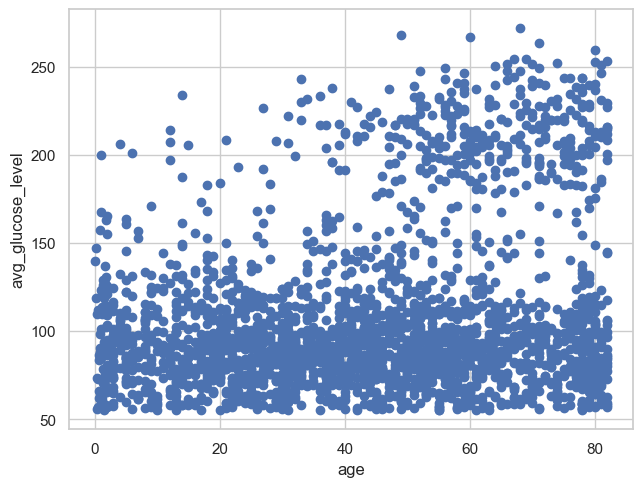

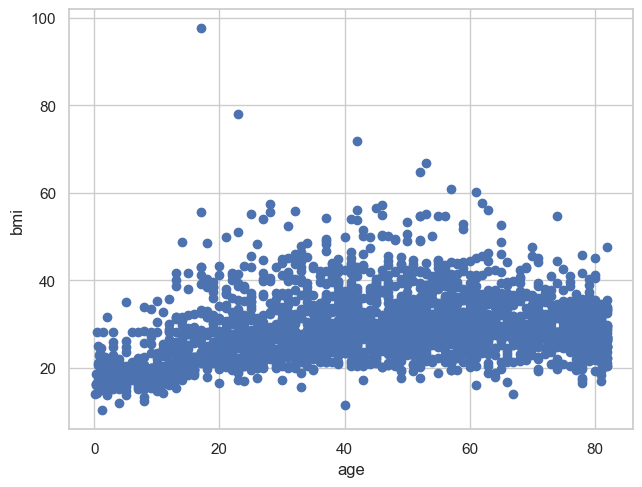

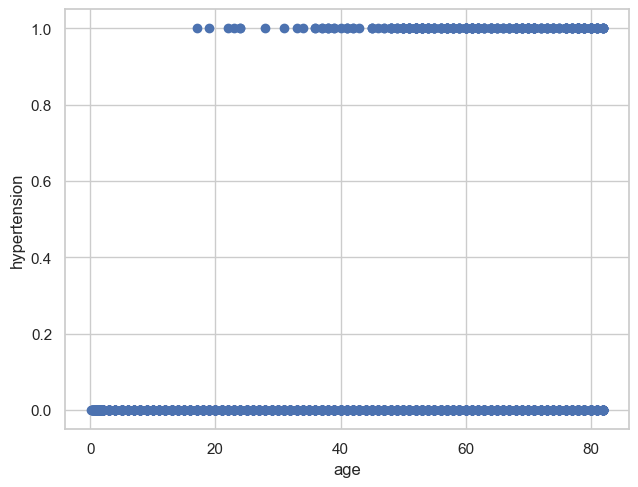

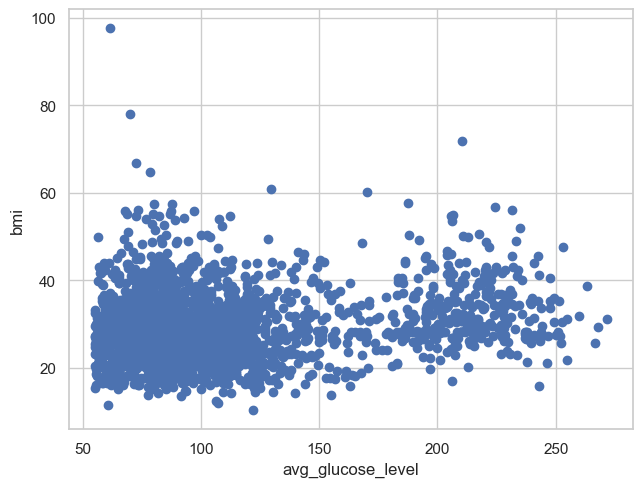

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Any

def draw_data_2d(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    y: List | None = None,
    classes: List | None = None,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        _, ax = plt.subplots()
    else:
        ax = subplot
    scatter = ax.scatter(df[df.columns[col1]], df[df.columns[col2]], c=y)
    ax.set(xlabel=df.columns[col1], ylabel=df.columns[col2])
    if classes is not None:
        ax.legend(
            scatter.legend_elements()[0], classes, loc="lower right", title="Classes"
        )

columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension']
df_temp = df[columns]

sns.set_theme(style="whitegrid")
print("ЗАВИСИМОСТЬ ЗНАЧЕНИЙ ДРУГ ОТ ДРУГА")
plt.figure(figsize=(16,12))
draw_data_2d(df_temp, 0, 1, subplot=plt.subplot(2, 2, 1))  # age vs avg_glucose_level
plt.figure(figsize=(16,12))
draw_data_2d(df_temp, 0, 2, subplot=plt.subplot(2, 2, 2))  # age vs bmi
plt.figure(figsize=(16,12))
draw_data_2d(df_temp, 0, 3, subplot=plt.subplot(2, 2, 3))  # age vs hypertension
plt.figure(figsize=(16,12))
draw_data_2d(df_temp, 1, 2, subplot=plt.subplot(2, 2, 4))  # avg_glucose_level vs bmi


видно, что индекс массы тела в зависимости от возраста в основном держится поменьше в раннем возрасте (до полового созревания, грубо говоря), а потом уже распределяется от адекватного до 40+ (в общем, вплоть до ожирения, с выбросами-то)

потом гипертония встречается все таки после 20 лет чаще

ну и чем ниже индекс массы тела, тем ниже и адекватнее уровень глюкозы (ну тут ясно, почему. люди с избыточным весом и болеют диабетом чаще)

продолжим приводить данные к нормальному виду, и теперь их стандартизуем:

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = df_temp.drop(columns=["hypertension"]).columns
columns_to_keep = ["hypertension"]
data_scaled = scaler.fit_transform(df_temp[columns_to_scale])
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_scale, index=df_temp.index)
df_scaled[columns_to_keep] = df_temp[columns_to_keep]

df_scaled

age  avg_glucose_level       bmi  hypertension
id                                                        
9046   0.981658           2.548208  0.960777             0
51676  0.718652           1.986183 -0.115701             0
31112  1.551505          -0.057528  0.435353             0
60182  0.192639           1.328647  0.678842             0
1665   1.507670           1.389985 -0.653940             1
...         ...                ...       ...           ...
34383  0.061136          -0.432990 -0.423266             0
8646   0.411811          -0.236875 -0.307929             0
46653  1.595339          -1.047440 -0.128516             1
1099  -1.297729          -0.158769 -0.884614             0
61676  1.420001          -0.854297 -0.512973             0

[2500 rows x 4 columns]

самое время применить иерархический алгоритм кластеризации (когда мы создаем дерево кластеров, где каждый уровень - это объединение более мелких кластеров)

In [165]:
# linkage_matrix = linkage(data_scaled, method='ward')
# plt.figure(figsize=(10,10))
# dendrogram(linkage_matrix)
# plt.title('Дендрограмма')
# plt.ylabel('')
# plt.xlabel('')
# plt.show()


import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy

def run_agglomerative(
    df: pd.DataFrame, num_clusters: int | None = 2
) -> cluster.AgglomerativeClustering:
    agglomerative = cluster.AgglomerativeClustering(
        n_clusters=num_clusters,
        compute_distances=True,
    )
    return agglomerative.fit(df)


def get_linkage_matrix(model: cluster.AgglomerativeClustering) -> np.ndarray:
    counts = np.zeros(model.children_.shape[0])  # type: ignore
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):  # type: ignore
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([model.children_, model.distances_, counts]).astype(float)

def draw_dendrogram(linkage_matrix: np.ndarray):
    hierarchy.dendrogram(linkage_matrix, truncate_mode="level", p=3)
    plt.xticks(fontsize=10, rotation=45)
    plt.tight_layout()

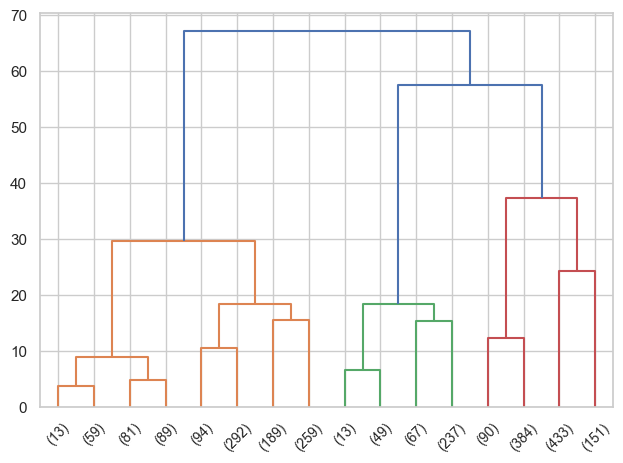

In [166]:
tree = run_agglomerative(df_scaled)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

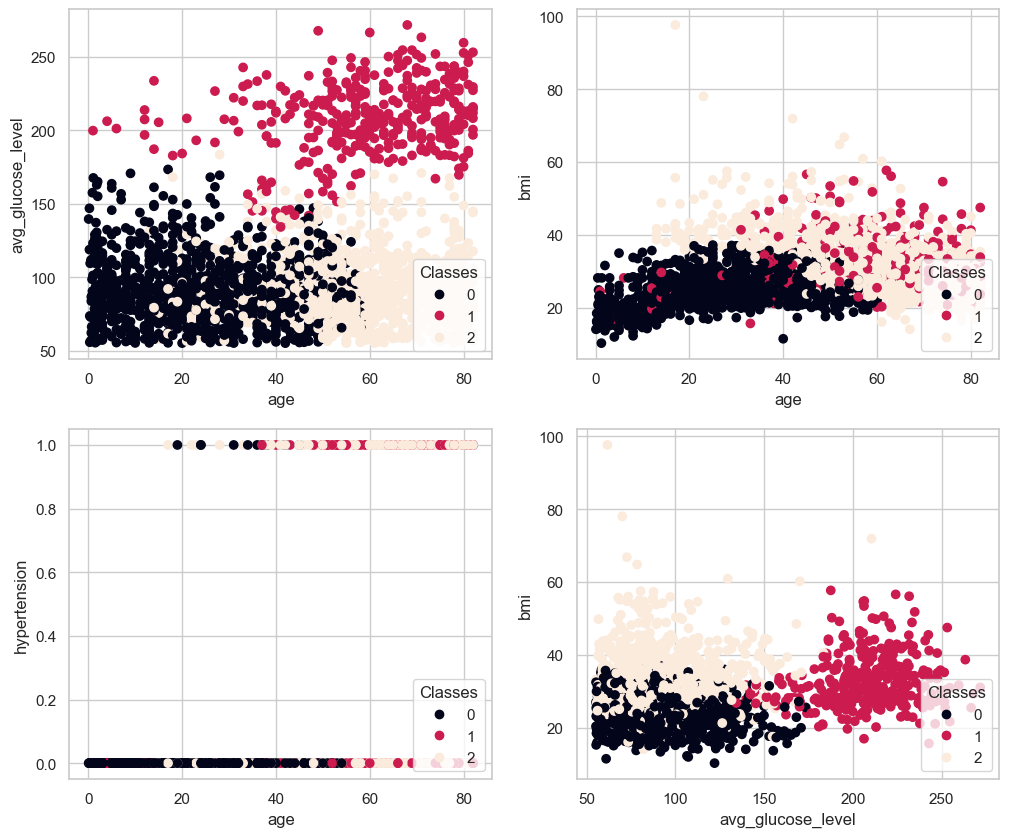

In [167]:
result = hierarchy.fcluster(linkage_matrix, 40, criterion="distance")
y_names = ['0', '1', '2']

plt.figure(figsize=(12, 10))


draw_data_2d(df_temp, 0, 1, result, y_names, subplot=plt.subplot(2, 2, 1))  
draw_data_2d(df_temp, 0, 2, result, y_names, subplot=plt.subplot(2, 2, 2))  
draw_data_2d(df_temp, 0, 3, result, y_names, subplot=plt.subplot(2, 2, 3))  
draw_data_2d(df_temp, 1, 2, result, y_names, subplot=plt.subplot(2, 2, 4))  

емае теперь переходим к НЕиерархической кластеризации
будем использовать метод К-средних (K-means), мы выбираем количество кластеров и флгоритм пытается распределить данные так, чтобы минимизировать расстояние между объектами и центром их кластера

In [168]:
from typing import Tuple

def print_cluster_result(
    df: pd.DataFrame, clusters_num: int, labels: np.ndarray, separator: str = ", "
):
    for cluster_id in range(clusters_num):
        cluster_indices = np.where(labels == cluster_id)[0]
        print(f"Cluster {cluster_id + 1} ({len(cluster_indices)}):")
        rules = [str(df.index[idx]) for idx in cluster_indices]
        print(separator.join(rules))
        print("")
        print("--------")


def run_kmeans(
    df: pd.DataFrame, num_clusters: int, random_state: int
) -> Tuple[np.ndarray, np.ndarray]:
    kmeans = cluster.KMeans(n_clusters=num_clusters, random_state=random_state)
    labels = kmeans.fit_predict(df)
    return labels, kmeans.cluster_centers_

In [169]:
random_state = 9

labels, centers = run_kmeans(df_scaled, 3, random_state) 
print_cluster_result(df_scaled, 3, labels)
display(centers)

Cluster 1 (1314):
31112, 53882, 10434, 27419, 60491, 12109, 12095, 12175, 27458, 4219, 70822, 38047, 33879, 14248, 712, 24977, 47306, 62602, 4651, 1261, 61960, 1845, 37937, 47472, 35626, 36338, 18587, 15102, 59190, 47167, 38829, 55927, 65842, 19557, 7356, 17013, 72366, 6118, 7371, 70676, 27169, 19773, 66159, 71673, 42117, 57419, 26015, 26727, 66638, 70042, 32399, 3253, 71796, 14499, 49130, 51169, 66315, 37726, 54385, 35512, 8154, 4639, 12363, 4712, 33175, 2346, 42072, 30456, 59125, 56546, 48405, 36706, 71639, 60744, 7547, 5563, 68798, 72918, 50522, 3352, 70943, 48796, 16817, 31563, 55824, 20439, 45965, 8045, 37651, 41241, 62861, 72081, 32503, 12482, 56939, 43054, 34567, 50931, 16590, 3512, 42899, 43364, 44993, 210, 28939, 60739, 67432, 2182, 40899, 62466, 36841, 33486, 54567, 66204, 8003, 28378, 41081, 16077, 30184, 66071, 36255, 23410, 35684, 18937, 491, 8580, 28484, 62019, 51314, 37060, 35578, 54921, 33454, 62439, 2548, 2390, 68023, 54724, 8899, 39105, 31154, 69959, 10552, 12917, 683

array([[ 0.47644409, -0.40065839,  0.33339772,  0.12947449],
       [-1.10132351, -0.3102823 , -0.77003252,  0.004914  ],
       [ 0.72629021,  2.08749131,  0.50685056,  0.25737265]])

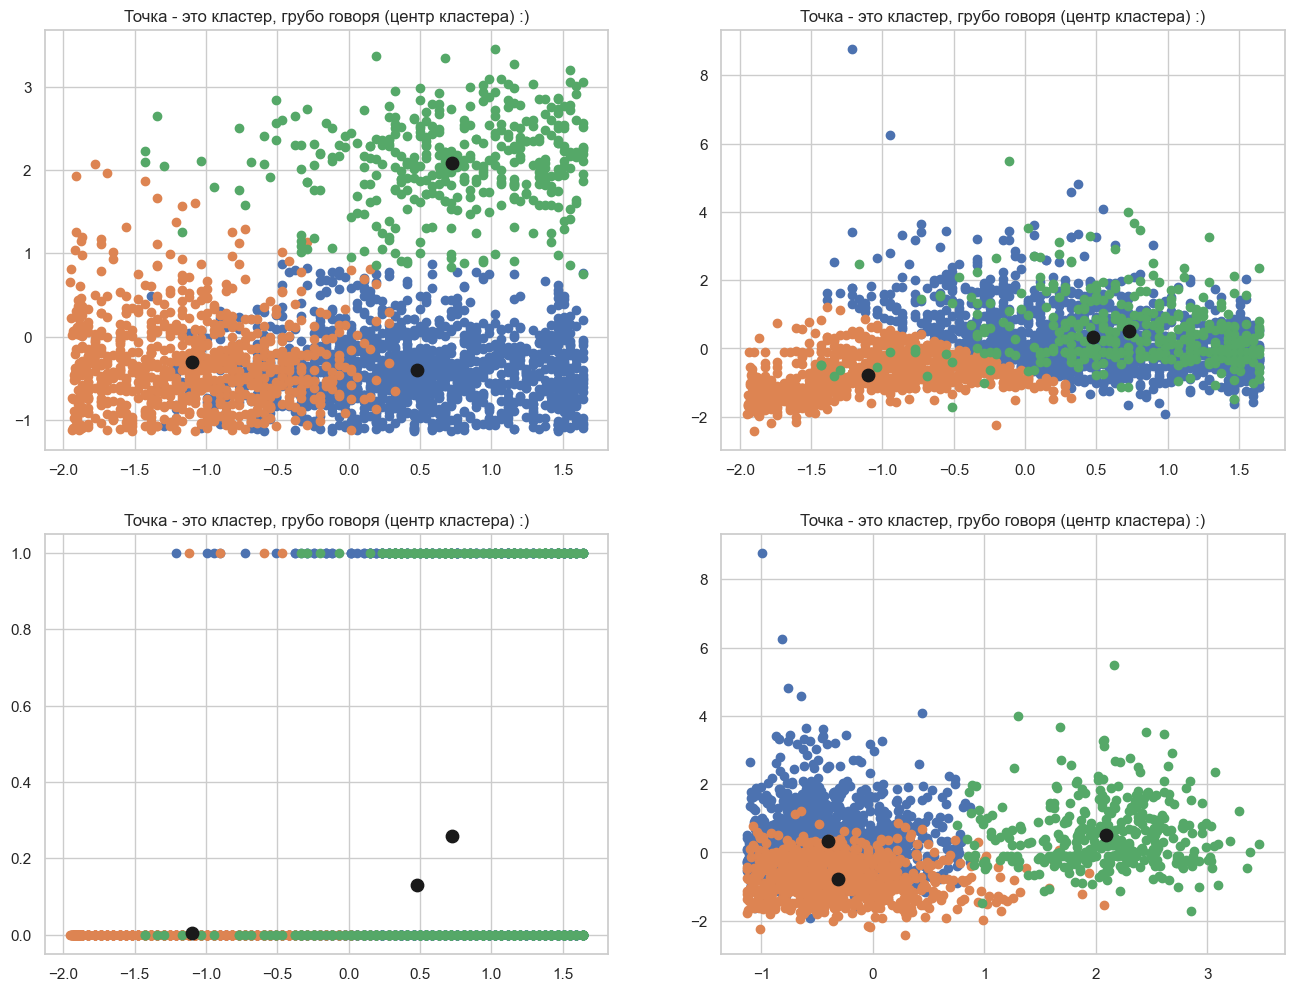

In [170]:
def draw_cluster_results(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    labels: np.ndarray,
    cluster_centers: np.ndarray,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        ax = plt
    else:
        ax = subplot

    centroids = cluster_centers
    u_labels = np.unique(labels)

    for i in u_labels:
        ax.scatter(
            df[labels == i][df.columns[col1]],
            df[labels == i][df.columns[col2]],
            label=i,
        )

    ax.scatter(centroids[:, col1], centroids[:, col2], s=80, color="k")
    plt.title('Точка - это кластер, грубо говоря (центр кластера) :)')


plt.figure(figsize=(16, 12))
draw_cluster_results(df_scaled, 0, 1, labels, centers, plt.subplot(2, 2, 1)) # age vs avg_glucose_level
draw_cluster_results(df_scaled, 0, 2, labels, centers, plt.subplot(2, 2, 2)) # age vs bmi
draw_cluster_results(df_scaled, 0, 3, labels, centers, plt.subplot(2, 2, 3)) # age vs hypertension
draw_cluster_results(df_scaled, 1, 2, labels, centers, plt.subplot(2, 2, 4)) # avg_glucose_level vs bmi

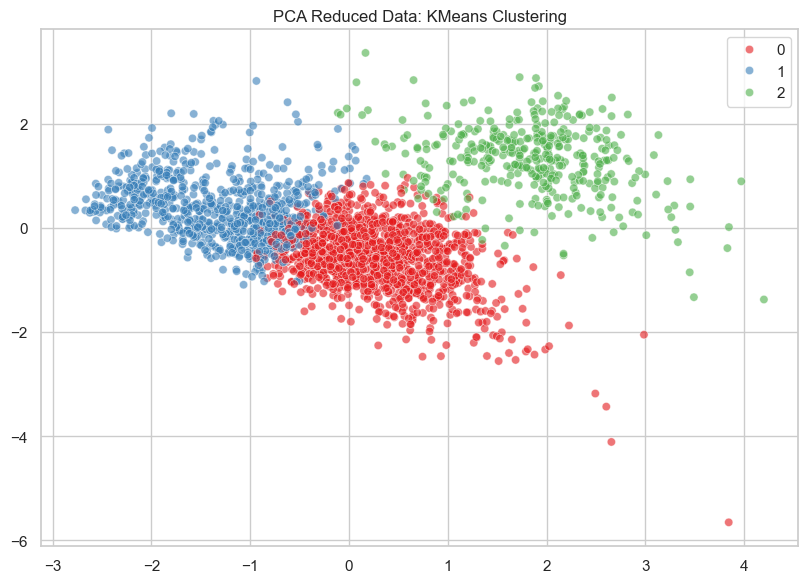

In [172]:
from sklearn.decomposition import PCA

#до двухмерного пространсва :) вжух
pca_data = PCA(n_components=2).fit_transform(df_scaled)
pca_data

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))

# Визуализация для KMeans кластеризации
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA Reduced Data: KMeans Clustering')

plt.tight_layout()
plt.show()

теперь интересная штука... с помощью так называемого метода локтя посмотрим на лучшее (оптимальное) количество кластеров на основе инерции (расстояния = сумме квадратов расстояния от объектов до центра кластера)

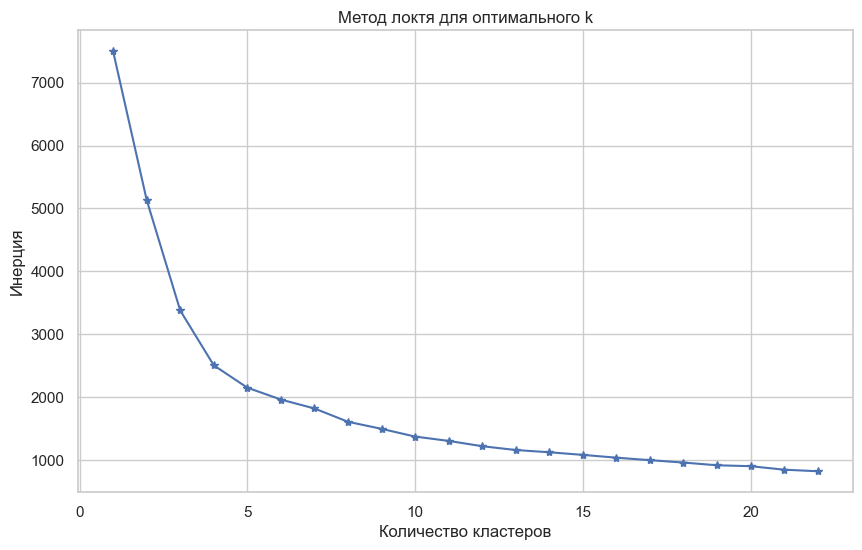

In [184]:
from sklearn.cluster import KMeans

inertias = []
clusters_range = range(1, 23)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='*')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

отсюда можем видеть, что кривая, в принципе, прекращает резко падать после 15 кластера. а в принципе, САМЫЙ резкий спад закончился на количесте кластеров,равному 3-5

ТЕПЕРЬ ЧАВО ой капс

теперь берем и считаем, насколько хорошо будут данные разделены на некое количество кластеров <br/>
делаем это с помощью коэффициента силуета - чем ближе он к 1, тем лучше сгруппирован объект и тем дальше он от соседних кластеров. чем ближе к нулю, тем он ближе к соседям.
чем ближе к -1, тем больше вероятность, что он неправильно сгруппирован в кластер

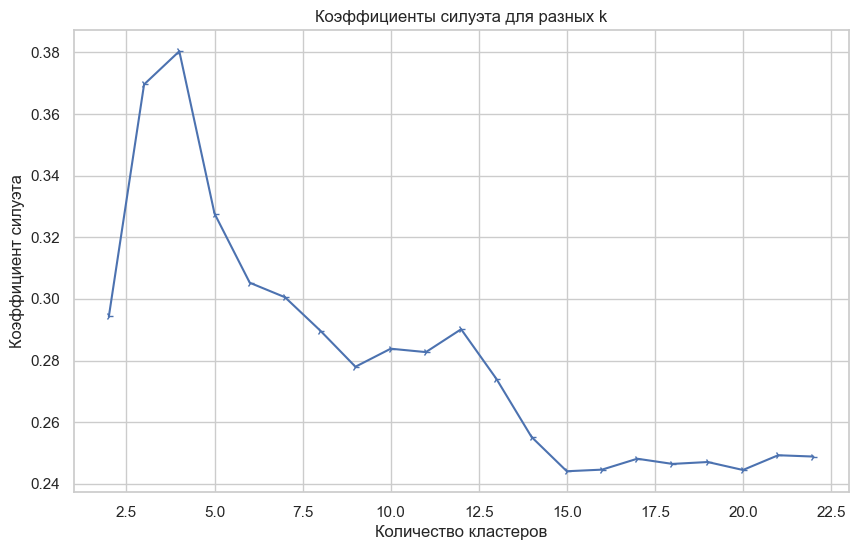

In [186]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='4')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

видим, что при количестве кластеров, равном трем, самое лучшее разбиение получается. вот и отличненько) ведь я как раз разбивала данные на 3 кластера